In [1]:
#IMPORTS

import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy.stats import iqr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#USING CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [2]:
#carregar o Dataset
music_train = pd.read_csv("train.csv", encoding = 'utf_8', engine ='python')

# Analise dos valores numericos

In [3]:
music_train.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [4]:
music_train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [5]:
music_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [6]:
# corrigir erros de valores

l = music_train['Artist Name']

novas_linhas = []
for index, row in music_train.iterrows():
    nome = row['Artist Name']
    if "feat." in nome:
        #obter todos os nomes
        temp = nome.split("(feat.")
        for n in temp:
            if ")" in n:
                temp2 = n.split(")")
                name = temp2[0].strip()
                #duplicar linha
                nova_linha = row
                nova_linha['Artist Name'] = name
                novas_linhas.append(nova_linha)
        #alterar linha antiga
        row['Artist Name'] = temp[0].strip()
    else:
        if "," in nome:
            #obter todos os nomes
            temp = nome.split(",")
            i = 0
            for n in temp:
                if i==0:
                    i+=1
                else:
                    name = n.strip()
                    #duplicar linha
                    nova_linha = row
                    nova_linha['Artist Name'] = name
                    novas_linhas.append(nova_linha)
                    i+=1
            #alterar original para o primeiro nome que aparece
            row['Artist Name'] = temp[0].strip()


#juntar novas linhas ao nosso dataset
for linha in novas_linhas:
    music_train = music_train.append(linha)

In [7]:
music_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18907 entries, 0 to 17974
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         18907 non-null  object 
 1   Track Name          18907 non-null  object 
 2   Popularity          18428 non-null  float64
 3   danceability        18907 non-null  float64
 4   energy              18907 non-null  float64
 5   key                 16806 non-null  float64
 6   loudness            18907 non-null  float64
 7   mode                18907 non-null  int64  
 8   speechiness         18907 non-null  float64
 9   acousticness        18907 non-null  float64
 10  instrumentalness    14317 non-null  float64
 11  liveness            18907 non-null  float64
 12  valence             18907 non-null  float64
 13  tempo               18907 non-null  float64
 14  duration_in min/ms  18907 non-null  float64
 15  time_signature      18907 non-null  int64  
 16  Clas

# Analise de duplicados

In [8]:
# Remove linhas duplicados
music_train = music_train.drop_duplicates()

In [9]:
music_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18610 entries, 0 to 17974
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         18610 non-null  object 
 1   Track Name          18610 non-null  object 
 2   Popularity          18155 non-null  float64
 3   danceability        18610 non-null  float64
 4   energy              18610 non-null  float64
 5   key                 16530 non-null  float64
 6   loudness            18610 non-null  float64
 7   mode                18610 non-null  int64  
 8   speechiness         18610 non-null  float64
 9   acousticness        18610 non-null  float64
 10  instrumentalness    14071 non-null  float64
 11  liveness            18610 non-null  float64
 12  valence             18610 non-null  float64
 13  tempo               18610 non-null  float64
 14  duration_in min/ms  18610 non-null  float64
 15  time_signature      18610 non-null  int64  
 16  Clas

In [10]:
# Analise de linhas parcialmente duplicadas
# se existe para a mesma musica mais do que um artista

counts = music_train['Track Name'].value_counts().to_dict()

res = False

for x, y in counts.items():
    if(y>1):
        cond = music_train['Track Name'] == x
        l = music_train[cond]['Artist Name'].unique()
        if(len(l)>1):
            res = True
        #print('A musica '+ x + 'tem os artistas : ' + l)
        #print('')

if(res):
    print("Existe nomes de músicas iguais para artistas diferentes")

Existe nomes de músicas iguais para artistas diferentes


# Remoção de Colunas

In [11]:
# Remove a coluna "Track Name"
music_train = music_train.drop(['Track Name'],axis=1)

# Analise de valores nulos

In [12]:
music_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18610 entries, 0 to 17974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         18610 non-null  object 
 1   Popularity          18155 non-null  float64
 2   danceability        18610 non-null  float64
 3   energy              18610 non-null  float64
 4   key                 16530 non-null  float64
 5   loudness            18610 non-null  float64
 6   mode                18610 non-null  int64  
 7   speechiness         18610 non-null  float64
 8   acousticness        18610 non-null  float64
 9   instrumentalness    14071 non-null  float64
 10  liveness            18610 non-null  float64
 11  valence             18610 non-null  float64
 12  tempo               18610 non-null  float64
 13  duration_in min/ms  18610 non-null  float64
 14  time_signature      18610 non-null  int64  
 15  Class               18610 non-null  int64  
dtypes: f

In [13]:
music_train.isna().sum()

Artist Name              0
Popularity             455
danceability             0
energy                   0
key                   2080
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4539
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

# Podemos verificar imediatamente alguns problemas do nosso dataset:   
- A duração da musica tem valores em minutos e em milisegundos -> Escolher uma unidade de tempo e uniformizar dados para essa mesma unidade   
- Nas colunas de Popularity, Key e Instrumentalness verifica-se a presença de valores nulos, sendo por isso necessário tratá-los
- Existem métricas cuja escala é de 0 a 100 e outras que a escala é de 0 a 1 -> Necessidade de normalizar dados

# 1 - Transformar a duração da música para minutos

In [14]:
def ms_to_min(duracao):
    if(duracao > 1000):
        return float(duracao / 60000.0)
    return duracao

music_train['Duracao'] = music_train['duration_in min/ms'].apply(ms_to_min)

music_train = music_train.drop(['duration_in min/ms'], axis=1)

music_train.head()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Class,Duracao
0,Bruno Mars,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,4,5,3.909933
1,Boston,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4,10,4.195550
2,The Raincoats,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,4,6,1.827783
3,Deno,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,4,5,2.899467
4,Red Hot Chili Peppers,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,4,10,3.832667


# 2- Preencher os valores nulos 

In [15]:

# Usar o próximo valor
music_train['key'] = music_train['key'].fillna(method = 'bfill')
#music_train['instrumentalness'] = music_train['instrumentalness'].fillna(method = 'bfill')

# Realizar a interpolação
#music_train['Popularity'] = music_train['Popularity'].interpolate(method='linear', limit_direction = 'forward')
#music_train['Popularity'] = music_train['Popularity'].interpolate(method='spline', order=3)
#music_train['Popularity'] = music_train['Popularity'].interpolate(method='polynomial', order=2)

#Sustituir pela media
#music_train['instrumentalness'] = music_train['instrumentalness'].fillna(value=music_train['instrumentalness'].mean())

# Usar o próximo valor
#music_test['key'] = music_test['key'].fillna(method = 'bfill')
#music_test['instrumentalness'] = music_test['instrumentalness'].fillna(method = 'bfill')

# Realizar a interpolação
#music_test['Popularity'] = music_test['Popularity'].interpolate(method='linear', limit_direction = 'forward')
#music_test['Popularity'] = music_test['Popularity'].interpolate(method='spline', order=3)
#music_test['Popularity'] = music_test['Popularity'].interpolate(method='polynomial', order=2)

#Sustituir pela media
music_train['instrumentalness'] = music_train['instrumentalness'].fillna(value=music_train['instrumentalness'].mean())
music_train['Popularity'] = music_train['Popularity'].fillna(value=music_train['Popularity'].mean())

#music_train = music_train.fillna(value = 0)
#music_test = music_test.fillna(value = 0)

music_train.isna().sum()

Artist Name         0
Popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
Class               0
Duracao             0
dtype: int64

# 3- Analise da matriz de correlacao

<AxesSubplot:>

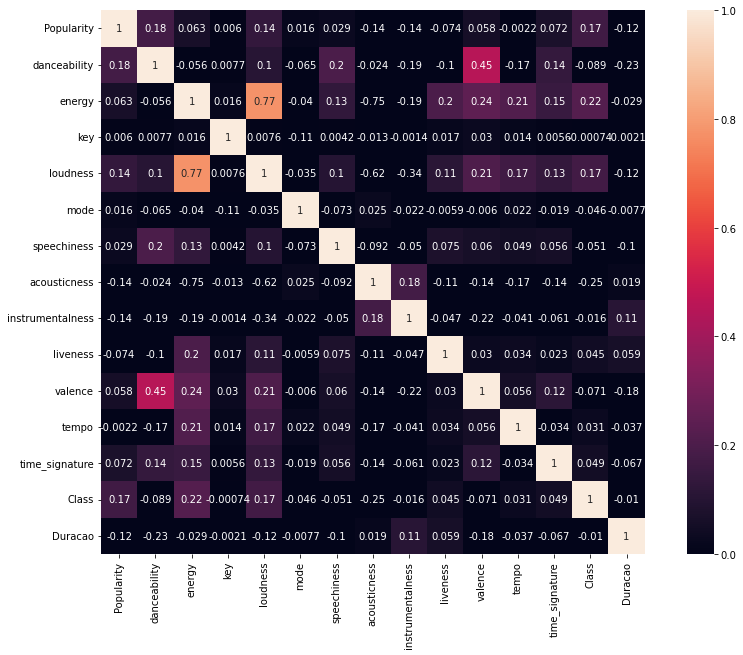

In [16]:
corr_matrix= music_train.corr()
f, ax =plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix,vmin=0,vmax=1,square=True,annot=True)

Através da matriz de correlação, percebe-se que as colunas de Energy e Loudness estão bastante correlaciondas (0,77)
Antes de remover uma dessas colunas, deve-se testar a imporância de cada uma destas para a previsão do resultado final

# 4 - Analise dos outliers

In [19]:
#Outlier Detection

columns = music_train.columns
num = [col for col in columns if (music_train[col].dtype == 'int') | (music_train[col].dtype == 'float')]

#IQR * 1.5
def outlier_detector(df):
    Q1, Q3 = df.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    min_bound, max_bound = Q1 - IQR * 1.5, Q3 + IQR * 1.5
    df_idx = df.loc[(df < min_bound) | (df > max_bound)].index
    return df_idx

print('# Outlieres: ')
for col_ in num:
    print(col_,':', len(outlier_detector(music_train[col_])))

"""
#Box-plot
plt.figure(figsize = (5,5))
plt.title('Popularity')
plt.boxplot(music_train['Popularity'])

plt.figure(figsize = (5,5))
plt.title('danceability')
plt.boxplot(music_train['danceability'])

plt.figure(figsize = (5,5))
plt.title('energy')
plt.boxplot(music_train['energy'])

plt.figure(figsize = (5,5))
plt.title('key')
plt.boxplot(music_train['key'])

plt.figure(figsize = (5,5))
plt.title('loudness')
plt.boxplot(music_train['loudness'])

plt.figure(figsize = (5,5))
plt.title('speechiness')
plt.boxplot(music_train['speechiness'])

plt.figure(figsize = (5,5))
plt.title('acousticness')
plt.boxplot(music_train['acousticness'])

plt.figure(figsize = (5,5))
plt.title('instrumentalness')
plt.boxplot(music_train['instrumentalness'])

plt.figure(figsize = (5,5))
plt.title('liveness')
plt.boxplot(music_train['liveness'])

plt.figure(figsize = (5,5))
plt.title('valence')
plt.boxplot(music_train['valence'])

plt.figure(figsize = (5,5))
plt.title('tempo')
plt.boxplot(music_train['tempo'])

plt.figure(figsize = (5,5))
plt.title('Duracao')
plt.boxplot(music_train['Duracao'])
"""

# Outlieres: 
Popularity : 51
danceability : 31
energy : 0
key : 0
loudness : 902
speechiness : 2115
acousticness : 0
instrumentalness : 2707
liveness : 1001
valence : 0
tempo : 32
Duracao : 981


"\n#Box-plot\nplt.figure(figsize = (5,5))\nplt.title('Popularity')\nplt.boxplot(music_train['Popularity'])\n\nplt.figure(figsize = (5,5))\nplt.title('danceability')\nplt.boxplot(music_train['danceability'])\n\nplt.figure(figsize = (5,5))\nplt.title('energy')\nplt.boxplot(music_train['energy'])\n\nplt.figure(figsize = (5,5))\nplt.title('key')\nplt.boxplot(music_train['key'])\n\nplt.figure(figsize = (5,5))\nplt.title('loudness')\nplt.boxplot(music_train['loudness'])\n\nplt.figure(figsize = (5,5))\nplt.title('speechiness')\nplt.boxplot(music_train['speechiness'])\n\nplt.figure(figsize = (5,5))\nplt.title('acousticness')\nplt.boxplot(music_train['acousticness'])\n\nplt.figure(figsize = (5,5))\nplt.title('instrumentalness')\nplt.boxplot(music_train['instrumentalness'])\n\nplt.figure(figsize = (5,5))\nplt.title('liveness')\nplt.boxplot(music_train['liveness'])\n\nplt.figure(figsize = (5,5))\nplt.title('valence')\nplt.boxplot(music_train['valence'])\n\nplt.figure(figsize = (5,5))\nplt.title('

In [20]:
def get_max_min_bound(df):
    Q1, Q3 = df.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    min_bound, max_bound = Q1 - IQR * 1.5, Q3 + IQR * 1.5
    return (min_bound, max_bound)

for col_ in num:
    print(col_,':', get_max_min_bound(music_train[col_]))   

Popularity : (-1.5, 90.5)
danceability : (0.08799999999999991, 1.0)
energy : (-0.03400000000000003, 1.3900000000000001)
key : (-6.0, 18.0)
loudness : (-16.402124999999998, 1.4908749999999982)
speechiness : (-0.03581250000000001, 0.1524875)
acousticness : (-0.68065, 1.14759)
instrumentalness : (-0.2716318818928991, 0.45351713648816516)
liveness : (-0.14200000000000002, 0.49640000000000006)
valence : (-0.2730000000000001, 1.239)
tempo : (35.09400000000002, 205.91399999999996)
Duracao : (1.2070416666666672, 6.340841666666666)


# 5 - Correção dos outliers

In [21]:
#tratar outliers Popularity
qt1 , qt2 = get_max_min_bound(music_train['Popularity'])

preencher = []
for at3 in zip(music_train['Popularity']):
    at = at3[0]
    if at > qt2:
        preencher.append(qt2)
    elif at < qt1:
        preencher.append(qt1)
    else:
        preencher.append(at)

music_train['Popularity'] = preencher

In [22]:
#tratar outliers danceability
qt1 , qt2 = get_max_min_bound(music_train['danceability'])

preencher = []
for at3 in zip(music_train['danceability']):
    at = at3[0]
    if at > qt2:
        preencher.append(qt2)
    elif at < qt1:
        preencher.append(qt1)
    else:
        preencher.append(at)

music_train['danceability'] = preencher

In [23]:
#tratar outliers loudness
qt1 , qt2 = get_max_min_bound(music_train['loudness'])

preencher = []
for at3 in zip(music_train['loudness']):
    at = at3[0]
    if at > qt2:
        preencher.append(qt2)
    elif at < qt1:
        preencher.append(qt1)
    else:
        preencher.append(at)

music_train['loudness'] = preencher

In [24]:
#tratar outliers speechiness
qt1 , qt2 = get_max_min_bound(music_train['speechiness'])

preencher = []
for at3 in zip(music_train['speechiness']):
    at = at3[0]
    if at > qt2:
        preencher.append(qt2)
    elif at < qt1:
        preencher.append(qt1)
    else:
        preencher.append(at)

music_train['speechiness'] = preencher

In [25]:
#tratar outliers instrumentalness
qt1 , qt2 = get_max_min_bound(music_train['instrumentalness'])

preencher = []
for at3 in zip(music_train['instrumentalness']):
    at = at3[0]
    if at > qt2:
        preencher.append(qt2)
    elif at < qt1:
        preencher.append(qt1)
    else:
        preencher.append(at)

music_train['instrumentalness'] = preencher

In [26]:
#tratar outliers liveness
qt1 , qt2 = get_max_min_bound(music_train['liveness'])

preencher = []
for at3 in zip(music_train['liveness']):
    at = at3[0]
    if at > qt2:
        preencher.append(qt2)
    elif at < qt1:
        preencher.append(qt1)
    else:
        preencher.append(at)

music_train['liveness'] = preencher

In [27]:
#tratar outliers tempo
qt1 , qt2 = get_max_min_bound(music_train['tempo'])

preencher = []
for at3 in zip(music_train['tempo']):
    at = at3[0]
    if at > qt2:
        preencher.append(qt2)
    elif at < qt1:
        preencher.append(qt1)
    else:
        preencher.append(at)

music_train['tempo'] = preencher

In [28]:
#tratar outliers Duracao
qt1 , qt2 = get_max_min_bound(music_train['Duracao'])

preencher = []
for at3 in zip(music_train['Duracao']):
    at = at3[0]
    if at > qt2:
        preencher.append(qt2)
    elif at < qt1:
        preencher.append(qt1)
    else:
        preencher.append(at)

music_train['Duracao'] = preencher

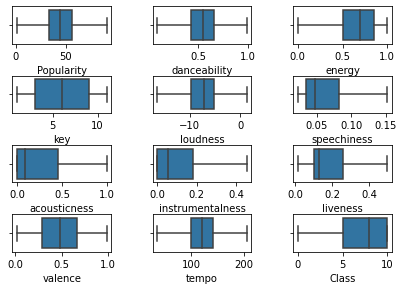

In [29]:
from scipy.stats import norm, skew
def plot(df, rc, kind = 'dist'):
    fig, ax = plt.subplots(rc[0],rc[1])
    fig.tight_layout()
    cols = df.columns
    ind = 0
    for r in range(rc[0]):
        for c in range(rc[1]):
            if ind >= len(cols): break
            x = df[cols[ind]]
            if kind == 'dist':
                sns.distplot(x=x, ax = ax[r,c], fit = norm)
            elif kind == 'box':
                sns.boxplot(x=x, ax = ax[r, c])
            ind += 1

feats = [c for c in music_train.select_dtypes(exclude = 'object').columns if music_train[c].nunique() >= 10]
plot(music_train[feats], [4,3], 'box')

# 6 - Algoritmos

In [30]:
RANDOM_SEED = 2021
SIZE = 0.30

# 7 - Normalização dos dados

In [31]:
# Corregir o tipo de dados do nome do artista
music_train['Artist Name'] = music_train['Artist Name'].astype(str)

# Initializing Encoder
number = preprocessing.LabelEncoder()

# Encoding
music_train["Artist Name"] = number.fit_transform(music_train["Artist Name"])

music_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18610 entries, 0 to 17974
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       18610 non-null  int32  
 1   Popularity        18610 non-null  float64
 2   danceability      18610 non-null  float64
 3   energy            18610 non-null  float64
 4   key               18610 non-null  float64
 5   loudness          18610 non-null  float64
 6   mode              18610 non-null  int64  
 7   speechiness       18610 non-null  float64
 8   acousticness      18610 non-null  float64
 9   instrumentalness  18610 non-null  float64
 10  liveness          18610 non-null  float64
 11  valence           18610 non-null  float64
 12  tempo             18610 non-null  float64
 13  time_signature    18610 non-null  int64  
 14  Class             18610 non-null  int64  
 15  Duracao           18610 non-null  float64
dtypes: float64(12), int32(1), int64(3)
memor

In [32]:
# Scaler
from sklearn.preprocessing import MinMaxScaler

X = music_train.drop(['Class'],axis=1)
Y = music_train['Class'].to_frame()

scaler_x = MinMaxScaler(feature_range=(-1,1)).fit(X)
x_scaled = pd.DataFrame(scaler_x.transform(X[X.columns]), columns=X.columns)


x_train, x_test, y_train, y_test = train_test_split(x_scaled.loc[:,['Artist Name','Popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','Duracao']], Y['Class'], test_size=SIZE, random_state=RANDOM_SEED)

# 8 - Redes Neuronais

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

print('TensorFlow version: ',tf.__version__)

TensorFlow version:  2.7.0


In [34]:
x_scaled.shape

(18610, 15)

In [35]:
def build_model(activation='relu', learning_rate=0.01):
    model=Sequential()
    #model.add(Flatten(input_shape=(15,)))
    model.add(Flatten(input_shape=(15,)))
    model.add(Dense(20, activation=activation))
    model.add(Dense(22,activation=activation))
    model.add(Dense(11, activation='softmax'))
    
    model.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['accuracy'])
    return model

In [36]:
model = build_model()

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 15)                0         
                                                                 
 dense (Dense)               (None, 20)                320       
                                                                 
 dense_1 (Dense)             (None, 22)                462       
                                                                 
 dense_2 (Dense)             (None, 11)                253       
                                                                 
Total params: 1,035
Trainable params: 1,035
Non-trainable params: 0
_________________________________________________________________


In [38]:
TUNING_DICT = {
    'activation' : ['relu','sigmoid'],
    'learning_rate' : [0.1,0.01,0.001]
}

# 'scoring' : ['precision_macro','recall_macro','f1_macro','accuracy']

In [39]:
kf = KFold(n_splits=5,shuffle=True, random_state=RANDOM_SEED)

model = KerasClassifier(build_fn=build_model, epochs=50, batch_size=32)
grid_search = GridSearchCV(estimator = model,
                          param_grid=TUNING_DICT,
                          cv = kf,
                          scoring = 'accuracy',
                          refit = 'True',
                          verbose = 1)

grid_search.fit(x_train, y_train, validation_split=0.2, verbose=1)

C:\Users\CARLOS~1\AppData\Local\Temp/ipykernel_13584/1163841444.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=build_model, epochs=50, batch_size=32)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/50
261/261 [==============================] - 1s 2ms/step - loss: 1.8498 - accuracy: 0.3402 - val_loss: 1.7368 - val_accuracy: 0.3823
Epoch 2/50
261/261 [==============================] - 0s 2ms/step - loss: 1.8215 - accuracy: 0.3436 - val_loss: 1.8113 - val_accuracy: 0.3453
Epoch 3/50
261/261 [==============================] - 0s 2ms/step - loss: 1.8384 - accuracy: 0.3330 - val_loss: 1.8501 - val_accuracy: 0.3271
Epoch 4/50
261/261 [==============================] - 0s 2ms/step - loss: 1.8447 - accuracy: 0.3209 - val_loss: 1.8172 - val_accuracy: 0.3170
Epoch 5/50
261/261 [==============================] - 0s 2ms/step - loss: 1.8372 - accuracy: 0.3312 - val_loss: 1.8560 - val_accuracy: 0.3640
Epoch 6/50
261/261 [==============================] - 0s 2ms/step - loss: 1.8201 - accuracy: 0.3396 - val_loss: 1.7864 - val_accuracy: 0.3477
Epoch 7/50
261/261 [==============================] - 0s 2ms/step - loss: 1.8210 - accur

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000020A68182D30>,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'learning_rate': [0.1, 0.01, 0.001]},
             refit='True', scoring='accuracy', verbose=1)

In [40]:
print('Best: %f using %s' % (grid_search.best_score_,grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params=grid_search.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with %r" % (mean,stdev, param))

Best: 0.459892 using {'activation': 'relu', 'learning_rate': 0.01}
0.354800 (0.011359) with {'activation': 'relu', 'learning_rate': 0.1}
0.459892 (0.005665) with {'activation': 'relu', 'learning_rate': 0.01}
0.456898 (0.007720) with {'activation': 'relu', 'learning_rate': 0.001}
0.430337 (0.012373) with {'activation': 'sigmoid', 'learning_rate': 0.1}
0.456054 (0.008470) with {'activation': 'sigmoid', 'learning_rate': 0.01}
0.445996 (0.007139) with {'activation': 'sigmoid', 'learning_rate': 0.001}


In [42]:
# Realizar Previsoes para os dados de teste
predictions = grid_search.predict(x_test)
print(predictions)

[10  9  9 ... 10  0 10]


# 9 - SVC

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC

#param_grid={'C':[1.0,1.5,1.6], 'gamma':[0.00015,0.0002,0.00025],'kernel': ['rbf']}

#grid= GridSearchCV(SVC(random_state=RANDOM_SEED),param_grid,refit=True,verbose=3)

#grid.fit(x_train,y_train)

In [ ]:
#print(grid.best_params_)
#print(grid.best_estimator_)

In [ ]:
#predictions = grid.predict(x_test)
#print(predictions)

# 10 - Avaliação

In [43]:
c = confusion_matrix(y_test,predictions)
print(c)

[[ 96   0  14   5   3   1  21   5   1  29  34]
 [ 14   0  12   1   2  20  60  13  26  48 241]
 [ 28   0  91  36   3  11  34  15   6  54  99]
 [ 14   0  16 104   1   2   8   3   0   6  17]
 [ 13   0   7   1  19   2   3   1   0  29  62]
 [  2   1   2   2   0 289  20   1   1  89  24]
 [ 45   1  17  15   2  53 163  28  33  95 302]
 [ 11   0   6   2   0   1   8 191   0   0   4]
 [  4   0   1   1   0   2  20   2 296   4 253]
 [ 51   4  16  11   7  71  52   5   5 361 165]
 [ 61   3  55  17  12  23  78   5 131 150 978]]


In [44]:
a = accuracy_score(y_test, predictions)
print(f'Accuracy = {a}')
p = precision_score(y_test, predictions, average='weighted')
print(f'Precision = {p}')
r = recall_score(y_test, predictions, average='weighted')
print(f'Recall = {r}')

Accuracy = 0.46355006269030985
Precision = 0.42433869298364985
Recall = 0.46355006269030985


In [45]:
f1 = f1_score(y_test, predictions, average='weighted')
print(f'f1_score = {f1}')

f1_score = 0.4325521258259234


In [46]:
beta = 0.5
fbeta = fbeta_score(y_test, predictions, beta=beta, average='weighted')
print(f'fbeta_score (beta={beta}) = {fbeta}')

fbeta_score (beta=0.5) = 0.424565279841503


In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.28      0.46      0.35       209
           1       0.00      0.00      0.00       437
           2       0.38      0.24      0.30       377
           3       0.53      0.61      0.57       171
           4       0.39      0.14      0.20       137
           5       0.61      0.67      0.64       431
           6       0.35      0.22      0.27       754
           7       0.71      0.86      0.78       223
           8       0.59      0.51      0.55       583
           9       0.42      0.48      0.45       748
          10       0.45      0.65      0.53      1513

    accuracy                           0.46      5583
   macro avg       0.43      0.44      0.42      5583
weighted avg       0.42      0.46      0.43      5583

